In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn.metrics
import scipy.stats as stats

In [2]:
df = pd.read_csv('diabetes.csv').iloc[:,1:].sample(frac=1)
y=df['Diabetes_binary'].astype('int32')
smoke_vs_diabetes = df.groupby(by=['Diabetes_binary','Smoker'],as_index=False)['Stroke'].count().rename(columns={'Stroke':'Total Count'}).pivot(columns='Diabetes_binary',index='Smoker',values='Total Count')

In [3]:
split = 0.8
limit = round(df.shape[0]*0.8)
df.drop(columns=['Diabetes_binary'])
x_train,y_train = df.iloc[:limit],y[:limit]
x_test,y_test =  df.iloc[limit:],y[limit:] 


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2,activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [5]:
model.fit(x_train,y_train,epochs=1)

1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.7225 - loss: 1.0411


In [6]:
y_calc = model.predict(x_test)
loss,accur = model.evaluate(x_test,y_test)
accur,loss

442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.9723 - loss: 0.2092


(0.9743245244026184, 0.20748062431812286)

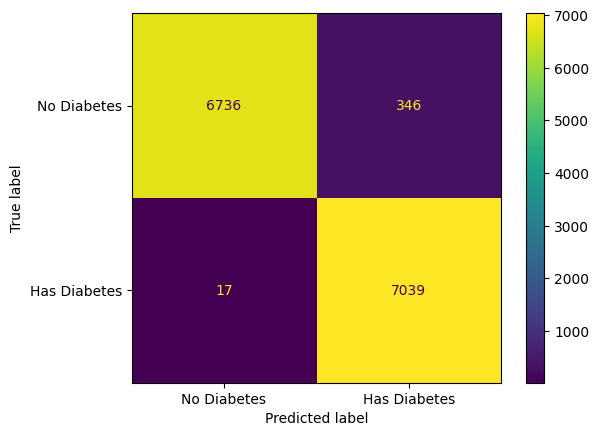

In [7]:
conf = sklearn.metrics.confusion_matrix(y_true=y_test,y_pred=np.argmax(y_calc,axis=1),labels=[0,1])
conf_matrix = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=["No Diabetes","Has Diabetes"])
conf_matrix.plot()

In [8]:
smoke_vs_diabetes

Diabetes_binary,0.0,1.0
Smoker,,
0.0,20065,17029
1.0,15281,18317


In [14]:
def areRelated(matrix:list[float]) -> None:
    dof = (matrix.shape[0]-1)*(matrix.shape[1]-1)
    alpha = 0.05
    critical_value = stats.chi2.ppf(1 - alpha, dof)
    chi2 = Chi2Test(matrix)

    if chi2>critical_value:
        print(f" There is an effect. Alternative Hypothesis Accepted.")
    else:
        print(f" There is no effect. Null Hypothesis Accepted.")

def Chi2Test(matrix:list[float]) -> float:
    chi = np.zeros(shape=(matrix.shape[0]+1,matrix.shape[1]+1),dtype='float32')
    for i,j in enumerate(matrix.itertuples()):
        chi[i,:matrix.shape[1]]=j[1:]

    for i in range(matrix.shape[0]):
        chi[i,-1]=np.sum(chi[i,:matrix.shape[1]])

    for i in range(matrix.shape[1]):
        chi[-1,i]=np.sum(chi[:matrix.shape[0],i])

    chi[-1,-1] = np.sum(chi[:matrix.shape[0],:matrix.shape[1]])

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            chi[i,j] = ((chi[i,j]-(chi[i,-1]*chi[-1,j])/chi[-1,-1])**2)/((chi[i,-1]*chi[-1,j])/chi[-1,-1])

    return np.sum(chi[:matrix.shape[0],:matrix.shape[1]])


In [15]:
areRelated(smoke_vs_diabetes)

 There is an effect. Alternative Hypothesis Accepted.


In [11]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Input((32,32,3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [12]:
model1.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1034 - loss: 2.9605
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1163 - loss: 2.2854
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3413 - loss: 1.8171
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4408 - loss: 1.5598
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4812 - loss: 1.4552
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5115 - loss: 1.3820
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5266 - loss: 1.3369
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5426 - loss: 1.2929
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5559 - loss: 1.2616
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5643 - loss: 1.2385


In [13]:
model1.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5466 - loss: 1.2767


[1.272928237915039, 0.5533999800682068]